In [204]:
import numpy as np
import cv2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Blank Image


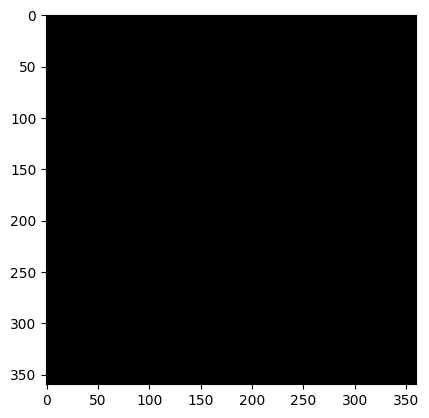

In [205]:
IMG_DIMS = (360,360)
CENTER = (IMG_DIMS[0]//2, IMG_DIMS[1]//2)
RADIUS = 160

FOCAL_RADIUS = 30

GAUSSIAN_BLUR_KERNEL_SIZE = (3, 3)
GAUSSIAN_BLUR_SD = 10

WHITE = (255, 255, 255)

image = np.zeros(IMG_DIMS, dtype=np.uint8)

print("Blank Image")
plt.imshow(image, cmap='gray')

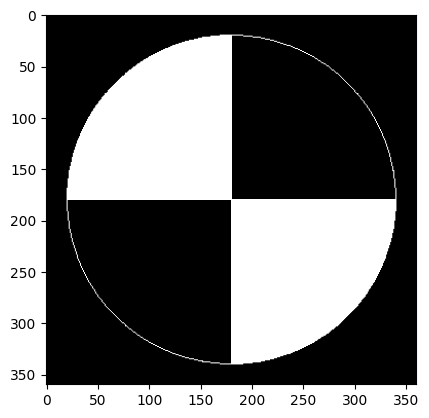

In [206]:
# Draw Quadrants.
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=0, endAngle=90, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=90, endAngle=180, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=180, endAngle=270, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=270, endAngle=360, color=WHITE)


# Draw lines to seperate quadrants.
image = cv2.line(image, (IMG_DIMS[0]//2 - 160, IMG_DIMS[1]//2), (IMG_DIMS[0]//2 + 160, IMG_DIMS[1]//2), color=WHITE)
image = cv2.line(image, (IMG_DIMS[0]//2, IMG_DIMS[1]//2 - RADIUS), (IMG_DIMS[0]//2, IMG_DIMS[1]//2 + RADIUS), color=WHITE)

# Fill in colors.
cv2.floodFill(image, None, (IMG_DIMS[0]//2 - 80, IMG_DIMS[1]//2 - RADIUS//2), 255)
cv2.floodFill(image, None, (IMG_DIMS[0]//2 + 80, IMG_DIMS[1]//2 + RADIUS//2), 255)
plt.imshow(image, cmap='gray')

original_image = image.copy()

Obtain the variance map of the source image

Region with focal radius : 30




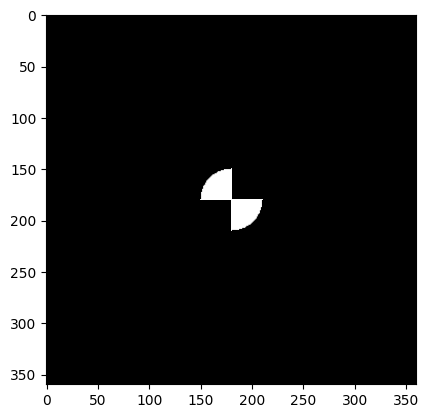

image with focal point at center initially


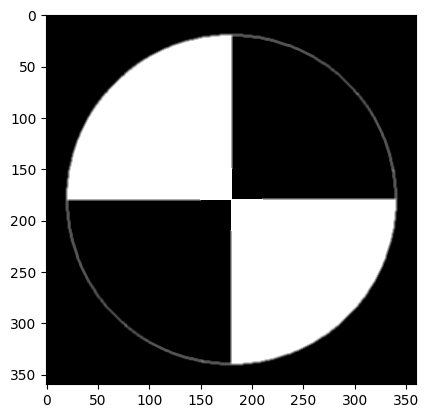

Variance map


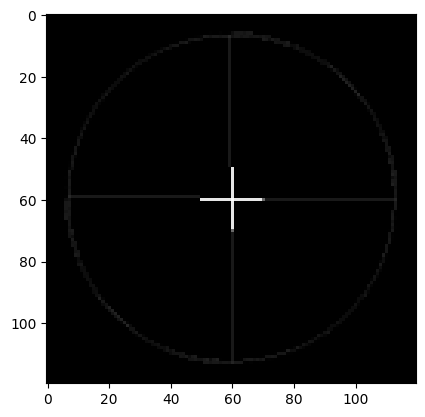

In [207]:
image = original_image.copy()

blurred_image = cv2.GaussianBlur(image, GAUSSIAN_BLUR_KERNEL_SIZE, GAUSSIAN_BLUR_SD)

mask = np.zeros(IMG_DIMS, dtype=np.uint8)
non_blurred_region = cv2.circle(mask, CENTER, FOCAL_RADIUS, (255, 255, 255), -1)
non_blurred_region = cv2.bitwise_and(non_blurred_region, image)
print('Region with focal radius : ' + str(FOCAL_RADIUS) + '\n\n')
plt.imshow(non_blurred_region, cmap='gray')
plt.show()

blurred_image_copy = blurred_image.copy()
blurred_image_copy = cv2.circle(blurred_image_copy, CENTER, FOCAL_RADIUS, (0, 0, 0), -1)
image = blurred_image_copy +  non_blurred_region

print('image with focal point at center initially')
plt.imshow(image, cmap='gray')
plt.show()

laplacian_filter_4 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
edge_mask = cv2.filter2D(image, -1, laplacian_filter_4)

variances = []
for x in range(0, IMG_DIMS[0]//3):
    for y in range(0, IMG_DIMS[1]//3):
        i = x * 3
        j = y * 3
        variances.append(np.var([edge_mask[i+0,j+0], edge_mask[i+0,j+1],edge_mask[i+0,j+2],edge_mask[i+1,j+0],edge_mask[i+1,j+1],
        edge_mask[i+1,j+2]
        ,edge_mask[i+2,j+0],edge_mask[i+2,j+1],edge_mask[i+2,j+2]]))

print('Variance map')
variance_image = np.array(variances).reshape(IMG_DIMS[0]//3, IMG_DIMS[1]//3)
plt.imshow(abs(variance_image), cmap='gray')

Randomly move the focal point and find said focal point translation from center and focal radius approximation

Region with focal radius : 30




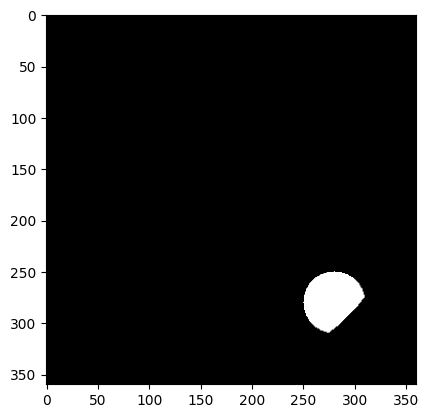

Test image with radius  30  being sharp with rest as blurred


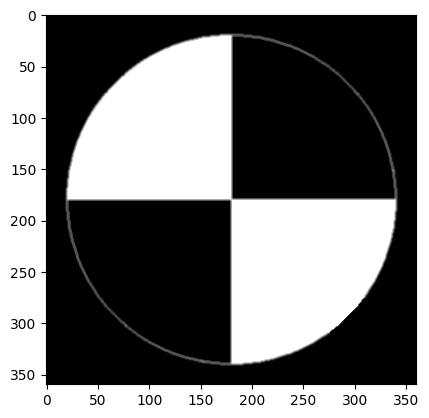

difference in test image and filtered non blurred region (in circular fasion)


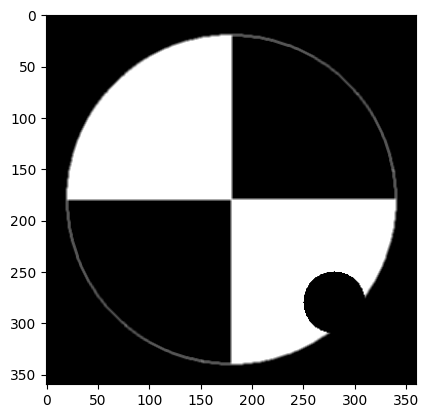

Visualization of separation of non blurred and blurred parts (radius = fr)


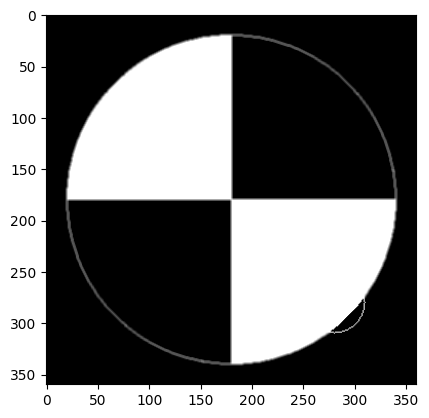

Laplacian mask


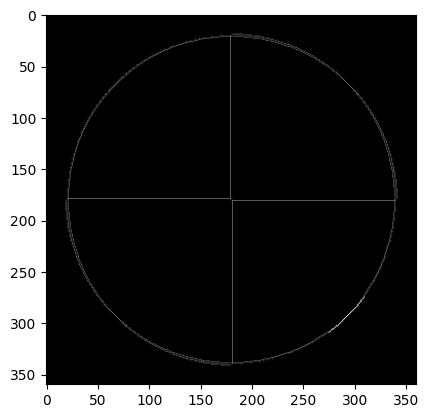

Variance map of image with shifted focal point : 


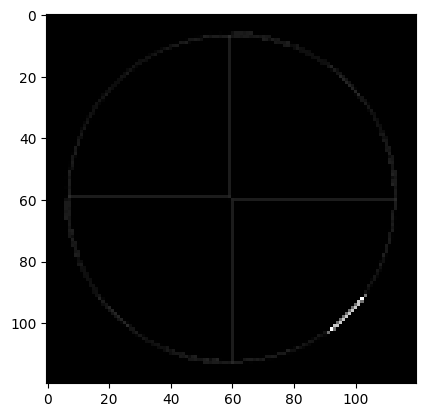

Absolute difference in variance maps


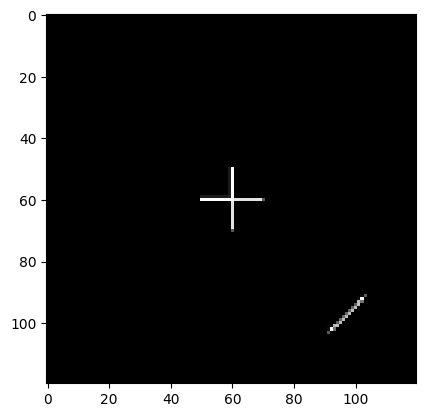

DETECTED FOCAL POINT :  (279, 279)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  99 99
Actual translation :  [100, 100]
BLUR DETECTED AT RADIUS :  30
FOR VERIFICATION : CORRECT fr WAS AT RADIUS :  30
ANGLE CORRECTION DETECTED :  0.7853981633974483
ACTUAL ANGLE              :  0.7853981633974483
------------------------------------------------------














In [208]:
translations = [[100, 100]]
for t  in translations:
    image = original_image.copy()

    # Move the focal point to a random position.
    new_focal_point = (CENTER[0]+t[0],CENTER[1]+t[1])
    blurred_image = cv2.GaussianBlur(image, GAUSSIAN_BLUR_KERNEL_SIZE, GAUSSIAN_BLUR_SD)
    mask = np.zeros(IMG_DIMS, dtype=np.uint8)
    non_blurred_region = cv2.circle(mask, new_focal_point, FOCAL_RADIUS, (255, 255, 255), -1)
    non_blurred_region = cv2.bitwise_and(non_blurred_region, image)
    print('Region with focal radius : ' + str(FOCAL_RADIUS) + '\n\n')
    plt.imshow(non_blurred_region, cmap='gray')
    plt.show()

    blurred_image_copy = blurred_image.copy()
    blurred_image_copy = cv2.circle(blurred_image_copy, new_focal_point, FOCAL_RADIUS, (0, 0, 0), -1)
    test_image = blurred_image_copy +  non_blurred_region
            
    print('Test image with radius ', FOCAL_RADIUS, ' being sharp with rest as blurred')
    plt.imshow(test_image, cmap='gray')
    plt.show()
    print('difference in test image and filtered non blurred region (in circular fasion)')
    plt.imshow(np.abs(test_image - non_blurred_region), cmap='gray')
    plt.show()
    print('Visualization of separation of non blurred and blurred parts (radius = fr)')
    test_image_copy = test_image.copy()
    plt.imshow(cv2.circle(test_image_copy, new_focal_point, FOCAL_RADIUS, (255, 0, 0), 1), cmap='gray')
    plt.show()

    # Perform laplacian of Gaussian.
    edge_mask = cv2.filter2D(test_image, -1, laplacian_filter_4)
    print('Laplacian mask')
    plt.imshow(edge_mask, cmap='gray')
    plt.show()

    test_image_variances = []
    for x in range(0, IMG_DIMS[0]//3):
        for y in range(0, IMG_DIMS[1]//3):
            i = x * 3
            j = y * 3
            test_image_variances.append(np.var([edge_mask[i+0,j+0], edge_mask[i+0,j+1],edge_mask[i+0,j+2],edge_mask[i+1,j+0],edge_mask[i+1,j+1],
            edge_mask[i+1,j+2]
            ,edge_mask[i+2,j+0],edge_mask[i+2,j+1],edge_mask[i+2,j+2]]))

    test_image_variances = np.array(test_image_variances).reshape(IMG_DIMS[0]//3, IMG_DIMS[1]//3)

    print('Variance map of image with shifted focal point : ')
    plt.imshow(test_image_variances, cmap='gray')
    plt.show()

    print('Absolute difference in variance maps')
    plt.imshow((np.abs(test_image_variances - variance_image)), cmap='gray')
    plt.show()

    # Find the position of the focal point.
    absolute_diff_variance_map = np.abs(test_image_variances - variance_image)
    countours, b  = cv2.findContours(cv2.threshold(absolute_diff_variance_map, 255, 255, cv2.THRESH_BINARY)[1].astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for c in  countours:
        x,y,w,h = cv2.boundingRect(c)
        focal_point_position = ((int)((x) * 3 + w/2), (int)((y) * 3 + h/2)) 
        if np.abs(focal_point_position[0] - CENTER[0] - t[0]) > 10 and np.abs(focal_point_position[1] - CENTER[1] - t[1]) > 10:
            continue

        print("DETECTED FOCAL POINT : ", focal_point_position)
        print("ACTUAL FOCAL POINT  :" , CENTER)
        print('Predicted translation of focal point : ', focal_point_position[0] -  CENTER[0], focal_point_position[1] - CENTER[1])
        print('Actual translation : ', t)
        test_variances = []
        comparison_index = 0
        for i in range(0, RADIUS, 1):
            edge_mask = cv2.filter2D(test_image, -1, laplacian_filter_4)
            mask = np.zeros(IMG_DIMS, dtype=np.uint8)
            curr_radius_check_range = cv2.circle(mask, focal_point_position, i, (255, 255, 255), -1)
            curr_region_to_check = cv2.bitwise_and(edge_mask, curr_radius_check_range)
            test_var = curr_region_to_check.var()

            edge_mask = cv2.filter2D(image, -1, laplacian_filter_4)
            mask = np.zeros(IMG_DIMS, dtype=np.uint8)
            curr_radius_check_range = cv2.circle(mask, focal_point_position, i, (255, 255, 255), -1)
            curr_region_to_check = cv2.bitwise_and(edge_mask, curr_radius_check_range)

            var = curr_region_to_check.var()


            if var != test_var:
                print('BLUR DETECTED AT RADIUS : ', i-1)
                print('FOR VERIFICATION : CORRECT fr WAS AT RADIUS : ', FOCAL_RADIUS)

                # Correction parameters:
                print('ANGLE CORRECTION DETECTED : ', np.arctan2((focal_point_position[1] - CENTER[1]), (focal_point_position[0] - CENTER[0])))
                print('ACTUAL ANGLE              : ', np.arctan2((t[1]), (t[0])))
                break
            comparison_index += 1

print('------------------------------------------------------\n\n\n\n\n\n\n\n\n\n\n\n')